In [3]:
pip install tensorflow


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=30

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory('PlantVillage',
                                                   shuffle=True,
                                                   image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                   batch_size=BATCH_SIZE)

Found 2152 files belonging to 3 classes.


Exploratory Data Analysis

In [4]:
class_name=dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset) #68 is because of batch size one batch is of 32 image

68

In [6]:
for image_batch, lable_batch in dataset.take(1):
    print(image_batch.shape),
    print(lable_batch.numpy())

(32, 256, 256, 3)
[1 1 1 1 2 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1]


In [7]:
for image_batch, lable_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[143. 141. 155.]
  [144. 142. 156.]
  [147. 145. 159.]
  ...
  [122. 111. 125.]
  [ 93.  82.  96.]
  [ 85.  74.  88.]]

 [[146. 144. 158.]
  [147. 145. 159.]
  [148. 146. 160.]
  ...
  [113. 102. 116.]
  [ 98.  87. 101.]
  [105.  94. 108.]]

 [[147. 145. 159.]
  [147. 145. 159.]
  [147. 145. 159.]
  ...
  [ 98.  87. 101.]
  [ 71.  60.  74.]
  [ 78.  67.  81.]]

 ...

 [[144. 141. 150.]
  [144. 141. 150.]
  [143. 140. 149.]
  ...
  [116. 106. 115.]
  [118. 108. 117.]
  [108.  98. 107.]]

 [[149. 146. 155.]
  [146. 143. 152.]
  [144. 141. 150.]
  ...
  [ 92.  82.  91.]
  [102.  92. 101.]
  [ 85.  75.  84.]]

 [[151. 148. 157.]
  [146. 143. 152.]
  [141. 138. 147.]
  ...
  [124. 114. 123.]
  [100.  90.  99.]
  [101.  91. 100.]]]


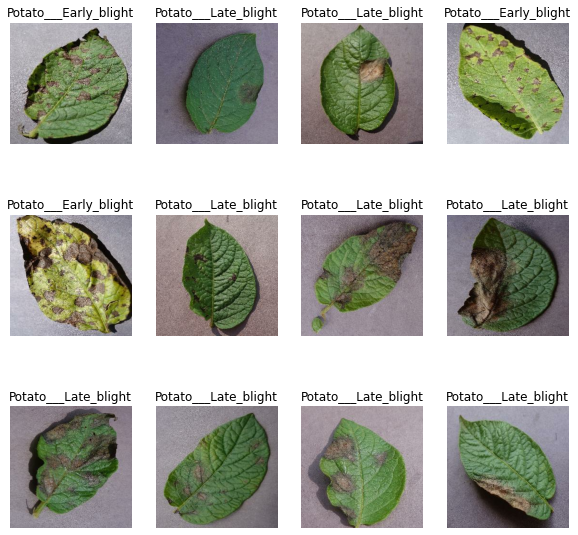

In [8]:
plt.figure(figsize=(10,10))
for image_batch, lable_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[lable_batch[i]])
        plt.axis("off")

SPLITING THE DATA

In [9]:
#80% OF DATA FOR TRANINIG
#10% DATA FOR VALIDATION
#10 DATA FOR TESTING


In [10]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [11]:
train_Ds=dataset.take(54)
len(train_Ds)

54

In [12]:
test_Ds=dataset.skip(54)
len(test_Ds)

14

In [13]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [14]:
val_Ds=test_Ds.take(6)
len(val_Ds)

6

In [15]:
test_ds=test_Ds.skip(6)
len(test_ds)

8

In [16]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).take(val_size)
    
    
    
    return train_ds, val_ds, test_ds
    
    

In [17]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [18]:
len(train_ds)

54

In [19]:
len(val_ds)

6

In [20]:
len(test_ds)

6

In [22]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [36]:
resize_and_rescale=tf.keras.Sequential([
     layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
     layers.experimental.preprocessing.Rescaling(1.0/255)
 ]) 

In [37]:
data_augmentation=tf.keras.Sequential([
     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     layers.experimental.preprocessing.RandomRotation(0.2),
 ])

In [38]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
    
])
model.build(input_shape=input_shape)

In [39]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_10 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 conv2d_37 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_36 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                

In [41]:
model.compile(optimizer='adam',
           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
           metrics=['accuracy'])

In [42]:
history=model.fit(
        train_ds,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        verbose=1,
        validation_data=val_ds,
    )

Epoch 1/30
54/54 [==============================] - 136s 2s/step - loss: 0.9117 - accuracy: 0.4902 - val_loss: 0.8908 - val_accuracy: 0.4844
Epoch 2/30
54/54 [==============================] - 125s 2s/step - loss: 0.6365 - accuracy: 0.7060 - val_loss: 0.4387 - val_accuracy: 0.8229
Epoch 3/30
54/54 [==============================] - 124s 2s/step - loss: 0.4156 - accuracy: 0.8177 - val_loss: 0.2747 - val_accuracy: 0.8854
Epoch 4/30
54/54 [==============================] - 123s 2s/step - loss: 0.3620 - accuracy: 0.8466 - val_loss: 0.2918 - val_accuracy: 0.8906
Epoch 5/30
54/54 [==============================] - 124s 2s/step - loss: 0.3798 - accuracy: 0.8466 - val_loss: 0.2419 - val_accuracy: 0.8958
Epoch 6/30
54/54 [==============================] - 123s 2s/step - loss: 0.2333 - accuracy: 0.9080 - val_loss: 0.1914 - val_accuracy: 0.9010
Epoch 7/30
54/54 [==============================] - 122s 2s/step - loss: 0.1714 - accuracy: 0.9387 - val_loss: 0.5489 - val_accuracy: 0.8177
Epoch 8/30
54